# LeNET: Clasificación de dígitos escritos a mano en categorías

#MNIST
El conjunto de datos [MNIST](http://yann.lecun.com/exdb/mnist/) (*Modified National Institute of Standards and Technology*), es un set de datos que contiene dígitos 70,000 escritos a mano. 60,000 serán para el entrenamiento y 10,000 para el conjunto de prueba.

![ejemplo mnist](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Cada imagen corresponde a una de 10 posibles categorías (los números del 0 al 9) y está almacenada en escala de grises, con un tamaño de 28x28 pixeles.

In [1]:
# Descargar el conjunto de datos desde Keras
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
# Dimensiones de los conjuntos de datos de MNIST
print('Entrenamiento:')
print(f'   x_train: {x_train.shape}')
print(f'   y_train: {y_train.shape}')
print('Prueba:')
print(f'   x_test: {x_test.shape}')
print(f'   y_test: {y_test.shape}')

Entrenamiento:
   x_train: (60000, 28, 28)
   y_train: (60000,)
Prueba:
   x_test: (10000, 28, 28)
   y_test: (10000,)


In [3]:
# Ejemplos de categorías
import numpy as np
print(np.random.choice(y_train,10))

[7 8 8 8 7 1 3 2 3 8]


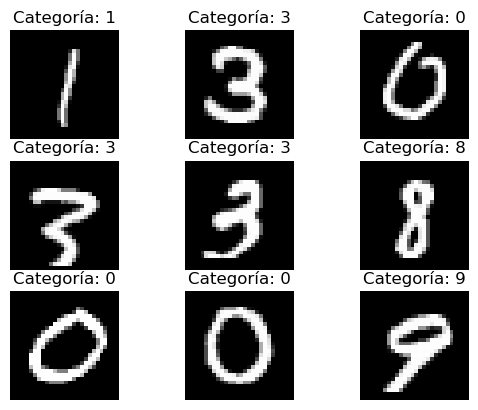

In [4]:
# Ejemplo de imágenes y categorías en el conjunto de entrenamiento
import matplotlib.pyplot as plt

# Selección aleatoria de 9 imágenes y su categoría
idx = np.random.choice(60000,9)
fig, axes = plt.subplots(3,3)
for i, axis in enumerate(axes.flat):
  axis.imshow(x_train[idx[i],:,:].reshape(28,28), cmap='gray');
  axis.axis('off')

  titulo = f'Categoría: {y_train[idx[i]]}'
  axis.set_title(titulo)

In [5]:
# Normalización de los pixeles para entrenamiento
print(f'x_train mínimo/máximo: {np.min(x_train)}/{np.max(x_train)} ')
x_train = x_train/255.
print(f'x_train normalizado mínimo/máximo: {np.min(x_train)}/{np.max(x_train)} ')

x_train mínimo/máximo: 0/255 
x_train normalizado mínimo/máximo: 0.0/1.0 


In [6]:
# Normalización de los pixeles para prueba
x_test = x_test/255.

In [7]:
# Ajuste de dimensiones de imágenes de entrada a 28x28x1
# Las originales tienen dimensiones 28x28

print(f'Tamaños originales: {x_train.shape}, {x_test.shape}')
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(f'Tamaños ajustados: {x_train.shape}, {x_test.shape}')

Tamaños originales: (60000, 28, 28), (10000, 28, 28)
Tamaños ajustados: (60000, 28, 28, 1), (10000, 28, 28, 1)


In [8]:
# Convertir cada categoría a representación one-hot
# Se usa en problemas de clasificación multiclase donde las etiquetas de las clases son categóricas y no numéricas
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# Visualizar nuevas categorías (aleatorio)
idx = np.random.choice(10000,4)
for i in idx:
  print(f'Categoría: {y_test[i]}')

Categoría: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Categoría: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Categoría: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Categoría: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
# Definición de la arquitectura de la red

## Librerías
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
SEED = 33
tf.random.set_seed(SEED)
np.random.seed(SEED)

## Arquitectura
lenet = Sequential()

# conv-1 (padding='same': salida/entrada con el mismo alto/ancho)
lenet.add(Conv2D(filters=6, kernel_size=(5,5), padding='same',
                 activation='relu', input_shape=(28,28,1), name='conv-1'))

# pooling-1
lenet.add(MaxPooling2D(pool_size=(2,2), strides=2, name='pooling-1'))

# conv-2 (padding='valid': no hay padding (default))
lenet.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', name='conv-2'))

# pooling-2
lenet.add(MaxPooling2D(pool_size=(2,2), strides=2, name='pooling-2'))

# Aplanar, FC1, FC2 y salida
lenet.add(Flatten(name='Flatten'))
lenet.add(Dense(120,activation='relu', name='FC1'))
lenet.add(Dense(84,activation='relu', name='FC2'))
lenet.add(Dense(10,activation='softmax', name='output'))

C:\Users\roage\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Resumen de la red
lenet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv-1 (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-1 (MaxPooling2D)        │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv-2 (Conv2D)                 │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling-2 (MaxPooling2D)        │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC2 (Dense)                     │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compilación de la red
sgd = SGD(learning_rate=0.1)
lenet.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
# Entrenamiento
nepochs = 20
tam_lote = 128
historia=lenet.fit(x_train,y_train,epochs=nepochs,batch_size=tam_lote, validation_data=(x_test,y_test), verbose=1)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7225 - loss: 0.8608 - val_accuracy: 0.9701 - val_loss: 0.0919
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9744 - loss: 0.0810 - val_accuracy: 0.9807 - val_loss: 0.0623
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9825 - loss: 0.0552 - val_accuracy: 0.9865 - val_loss: 0.0462
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0432 - val_accuracy: 0.9871 - val_loss: 0.0416
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9892 - loss: 0.0352 - val_accuracy: 0.9882 - val_loss: 0.0387
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9913 - loss: 0.0291 - val_accuracy: 0.9883 - val_loss: 0.0374
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9927 - loss: 0.0244 - val_accuracy: 0.9882 - val_loss: 0.0371
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.

In [14]:
# Definir gráfica de función de pérdida y exactitud por época (historia)
import matplotlib.pyplot as plt

def graficar(historia):
  plt.figure(figsize=(15,5))

  loss = historia.history['loss']
  accuracy = historia.history['accuracy']
  test_loss = historia.history['val_loss']
  test_accuracy = historia.history['val_accuracy']
  epochs = historia.epoch

  plt.subplot(121)
  plt.plot(epochs,loss,label='train_loss')
  plt.plot(epochs,test_loss,'b--',label='test_loss')
  plt.legend()

  plt.subplot(122)
  plt.plot(epochs,accuracy,label='train_acc')
  plt.plot(epochs,test_accuracy,'b--',label='test_acc')
  plt.legend()

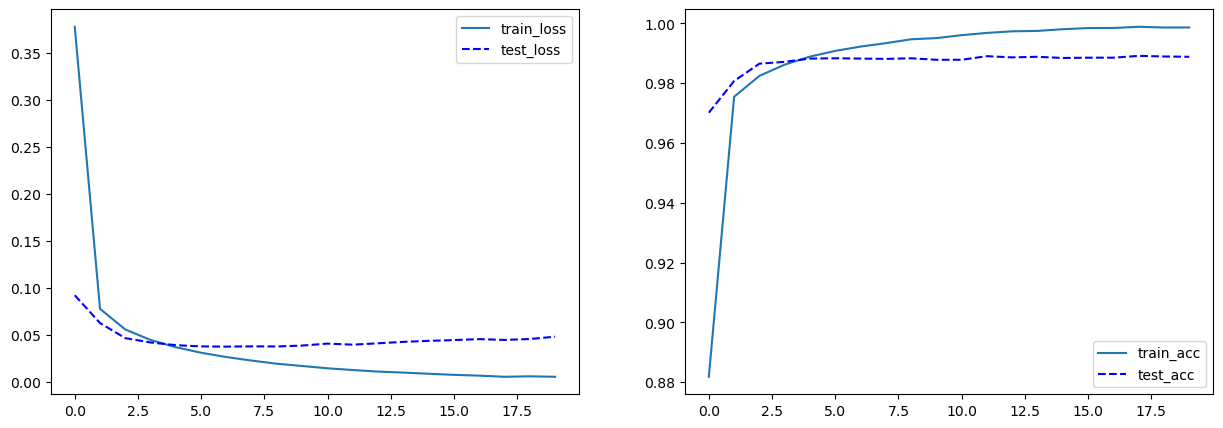

In [15]:
# Imprimir gráfica de función de pérdida y exactitud por época (historia)
graficar(historia)

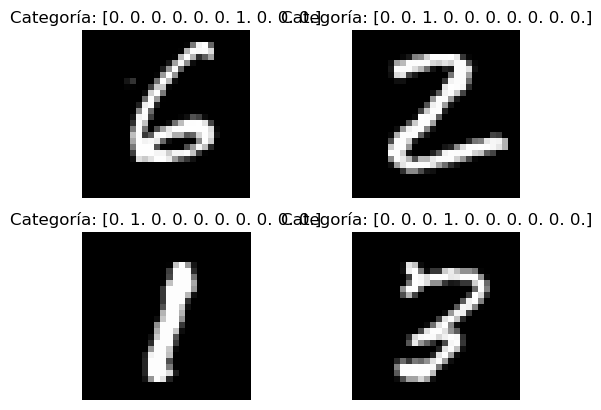

In [16]:
# Seleccionar y mostrar 4 imágenes del conjunto de prueba con su respectiva categoría
idx = np.random.choice(10000,4)

fig, axes = plt.subplots(2,2)
for i, axis in enumerate(axes.flat):
  axis.imshow(x_test[idx[i],:,:].reshape(28,28), cmap='gray');
  axis.axis('off')

  titulo = f'Categoría: {y_test[idx[i]]}'
  axis.set_title(titulo)

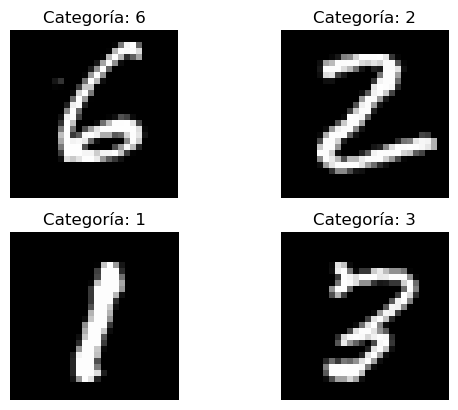

In [17]:
# Mostrar las 4 imágenes anteriores con su categoría recodificada
fig, axes = plt.subplots(2,2)
for i, axis in enumerate(axes.flat):
  axis.imshow(x_test[idx[i],:,:].reshape(28,28), cmap='gray');
  axis.axis('off')

  titulo = f'Categoría: {np.argmax(y_test[idx[i]])}'
  axis.set_title(titulo)